### PREDICTION OF BITCOIN PRICE USING LINEAR REGRESSION

Author: NIRUPAMA JACOB,
Data Science Intern at Widhya

In [1]:
# Importing required libraries for the task
import pandas as pd

In [2]:
# Reading data from remote link
df = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")
print('Data imported succesfully')

Data imported succesfully


In [3]:
#view the first 5 rows
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
#data extraction
df['btc_market_price'][1023]

13.6888

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [6]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [7]:
df.shape

(2906, 24)

In [8]:
import seaborn as sns

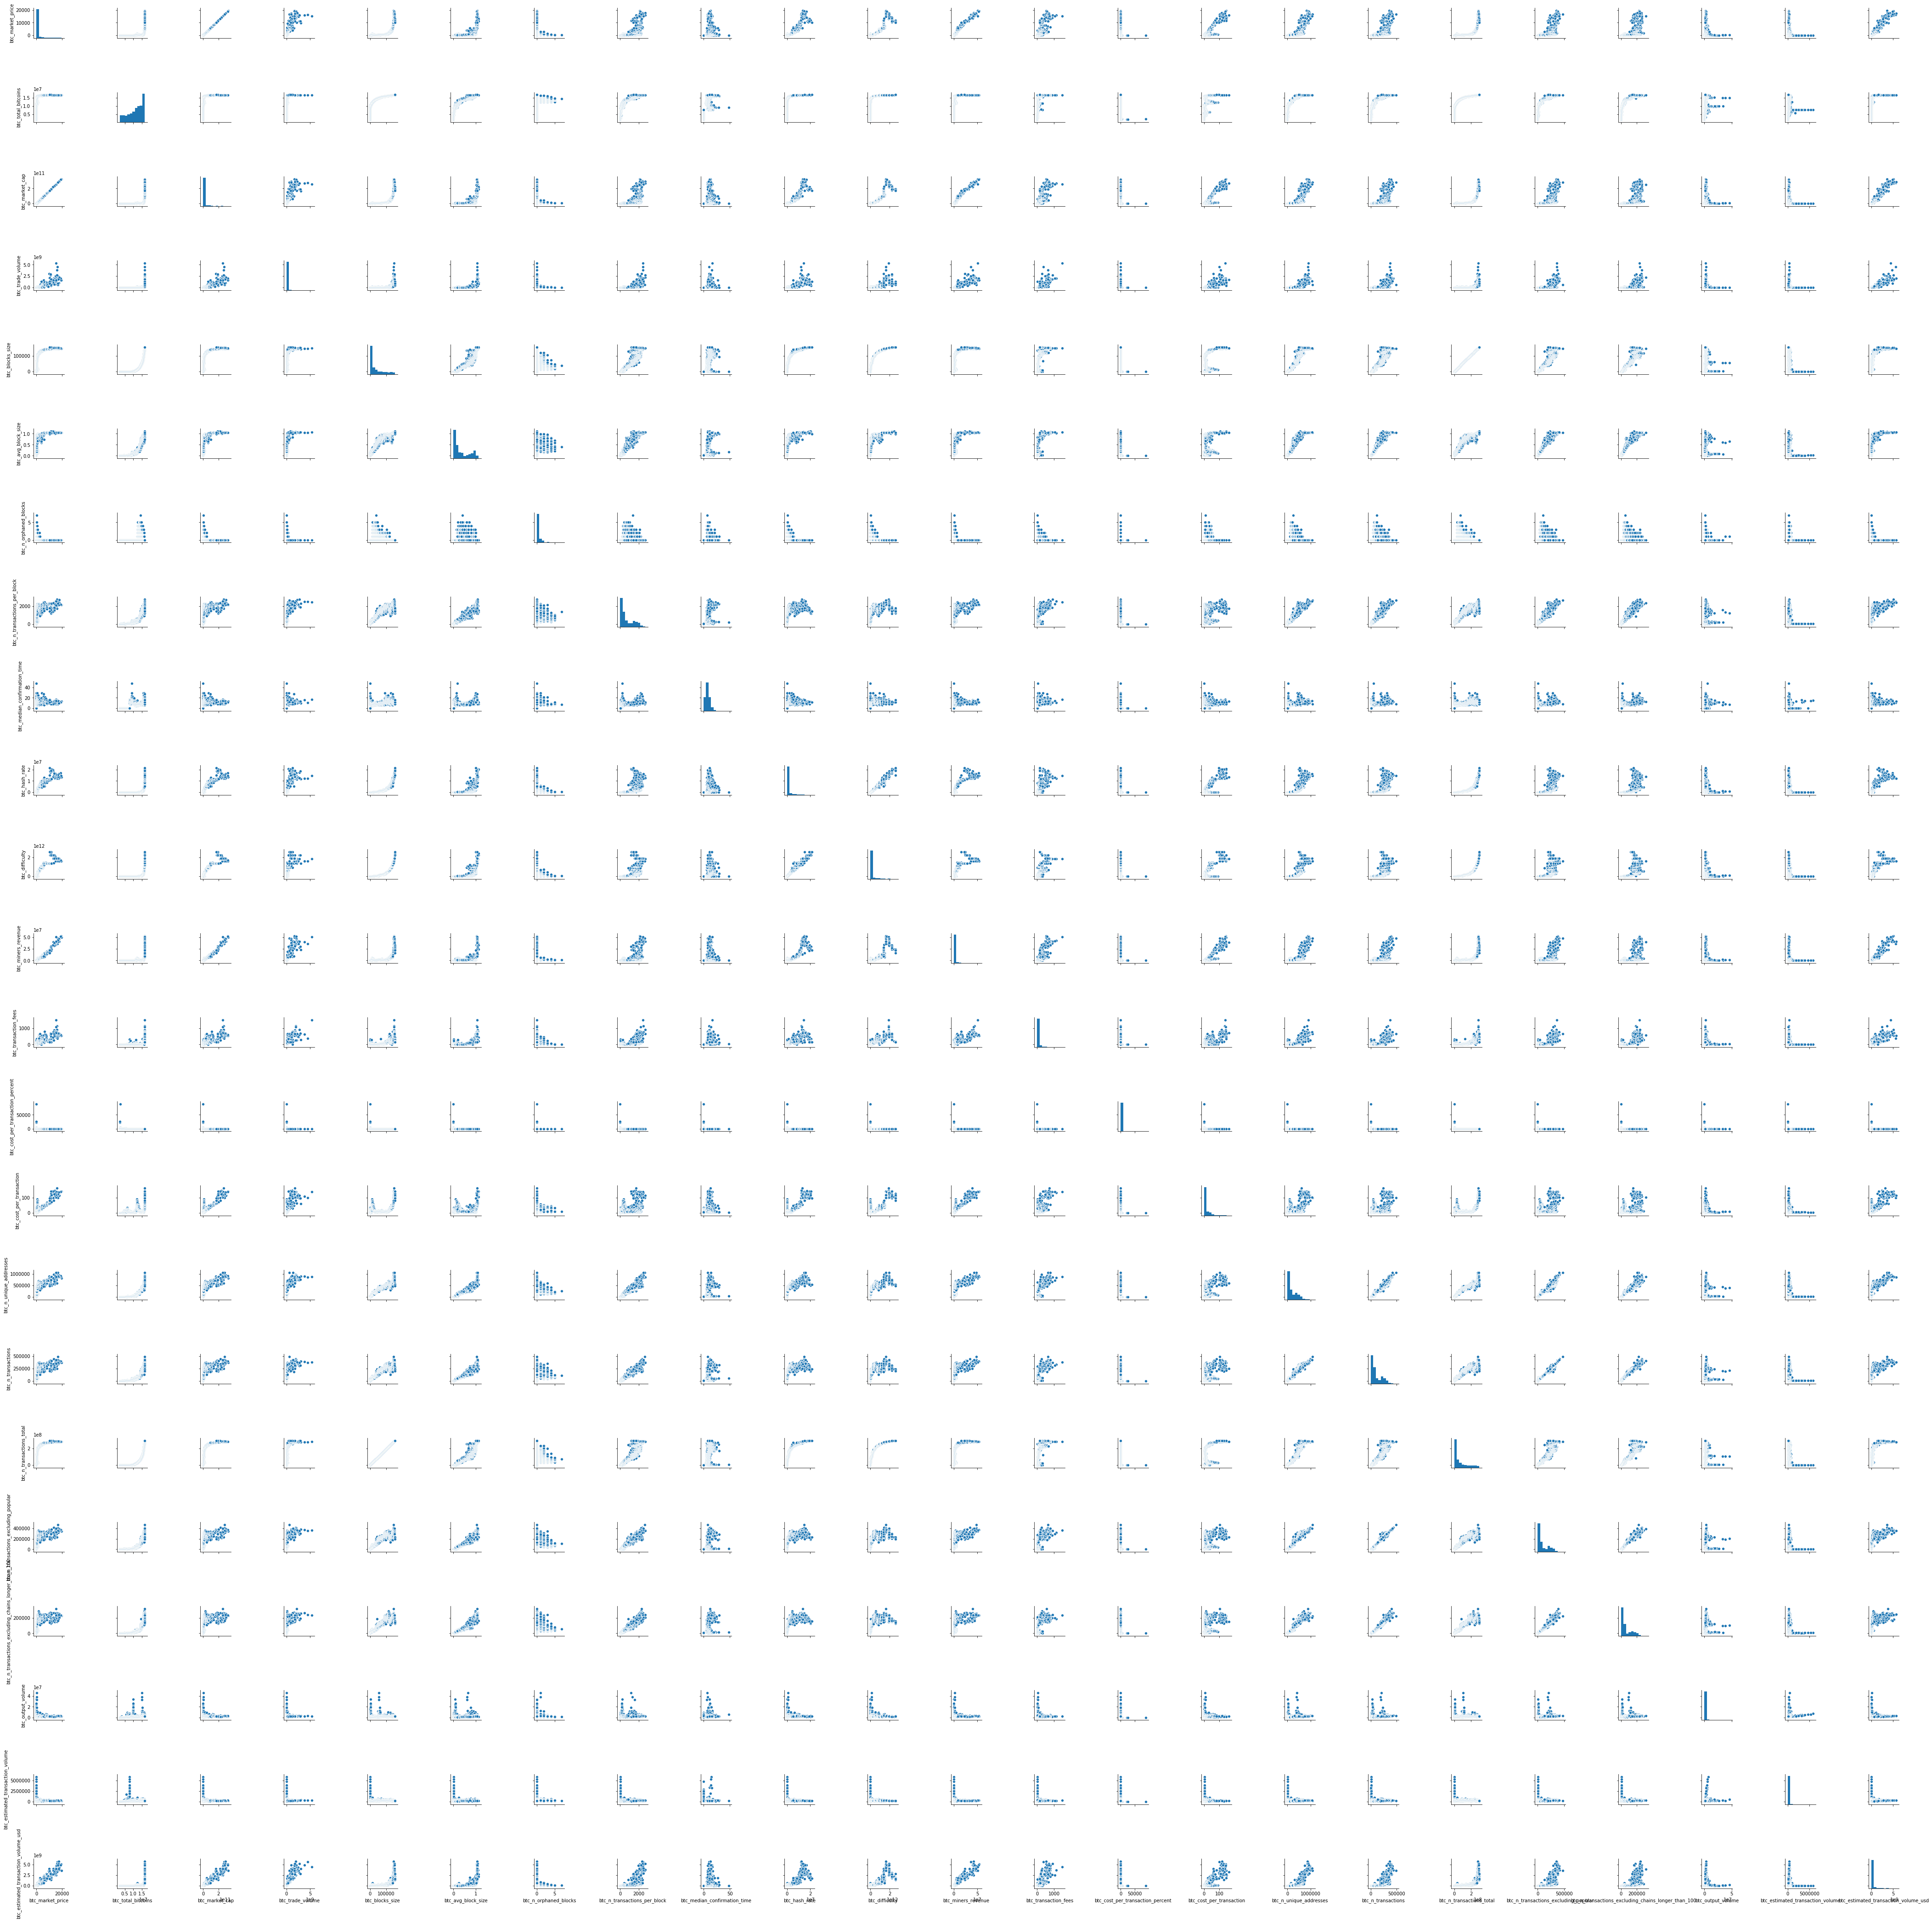

In [9]:
sns.pairplot(df)

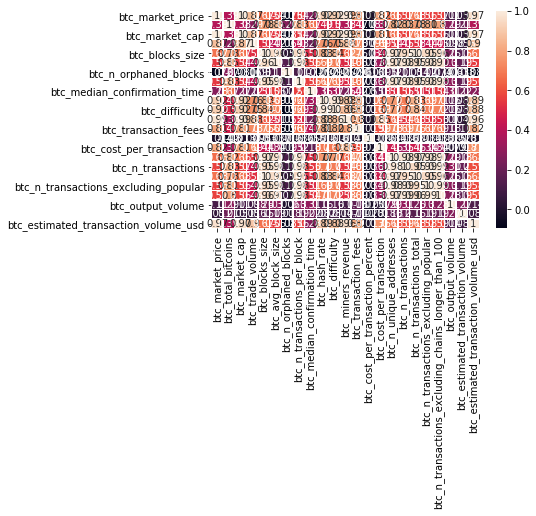

In [10]:
sns.heatmap(df.corr(), annot=True, linewidth=0.5)

In [11]:
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


In [13]:
#To check if there are any null values in the dataset:
    
df.isnull().values.any()

True

In [14]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

#### Since btc_market_cap, btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty, btc_hash_rate,btc_cost_per_transaction_percent are the independent variables to be considered,let's treat the missing values present,if any

#### Tofill the missing values in btc_difficulty let us first find the distribution of the variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002605D388>]],
      dtype=object)

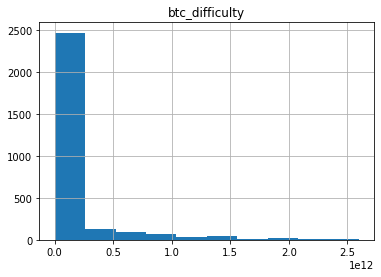

In [16]:
df.hist(column=['btc_difficulty'])

In [17]:
#since the data is skewed, median imputation is suggested
df['btc_difficulty']=df['btc_difficulty'].fillna(value=df['btc_difficulty'].median())

In [18]:
df['btc_difficulty']

0       2.527738e+00
1       2.527738e+00
2       2.527738e+00
3       2.527738e+00
4       2.527738e+00
            ...     
2901    2.600000e+12
2902    2.600000e+12
2903    2.600000e+12
2904    2.600000e+12
2905    2.600000e+12
Name: btc_difficulty, Length: 2906, dtype: float64

In [19]:
df['btc_difficulty'].isnull().sum()

0

##### The missing values are now treated

### REGRESSION MODEL

In [20]:
X=df[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]
X.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [21]:
y=df['btc_market_price']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: btc_market_price, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
188,2.546130e+05,337,6.856123e+02,2.034458,5.117735e+02,5.215282e-03,88.064623
900,1.076549e+08,32003,8.137351e+04,2.542684,2.036671e+06,1.468030e+01,5.095435
2073,4.041228e+09,149891,1.083198e+06,7.226573,6.088383e+10,4.751686e+05,1.177128
2398,9.682890e+09,180391,1.251012e+06,7.095468,2.210000e+11,1.799709e+06,1.281003
654,2.439780e+07,5533,2.348744e+04,4.244975,1.090716e+06,8.132966e+00,0.203795


In [24]:
X_test.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
582,4.269695e+07,6808,4.374840e+04,6.426027,1.755425e+06,13.089400,10.039596
2001,3.851209e+09,116923,1.130128e+06,9.665578,5.269984e+10,442733.250500,1.640023
1259,1.170005e+09,39998,4.750577e+05,11.877037,3.125696e+07,287.451510,2.724486
2129,6.788450e+09,219600,1.819001e+06,8.283245,7.910238e+10,625219.908600,1.019021
667,2.547840e+07,5319,2.003246e+04,3.766208,1.155038e+06,7.119741,3.842190


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 188 to 2732
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   btc_market_cap                    2324 non-null   float64
 1   btc_n_transactions                2324 non-null   int64  
 2   btc_miners_revenue                2324 non-null   float64
 3   btc_cost_per_transaction          2324 non-null   float64
 4   btc_difficulty                    2324 non-null   float64
 5   btc_hash_rate                     2324 non-null   float64
 6   btc_cost_per_transaction_percent  2324 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 145.2 KB


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 582 to 1347
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   btc_market_cap                    582 non-null    float64
 1   btc_n_transactions                582 non-null    int64  
 2   btc_miners_revenue                582 non-null    float64
 3   btc_cost_per_transaction          582 non-null    float64
 4   btc_difficulty                    582 non-null    float64
 5   btc_hash_rate                     582 non-null    float64
 6   btc_cost_per_transaction_percent  582 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 36.4 KB


In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_predict=lr.predict(X_test)

In [30]:
y_predict

array([ 1.51878600e+01,  2.72272750e+02,  1.08985818e+02,  4.63902814e+02,
        3.93680241e+00,  4.78932800e+01,  1.91214803e+00,  2.48600758e+03,
        7.95505752e+02,  1.15115406e+01,  9.68945389e+00, -3.95459081e+00,
        5.46295988e+03,  6.29341046e+00, -7.16509105e+00,  1.22127520e+01,
        2.42853288e+01,  3.00518441e+02,  8.84803680e+02,  7.29909877e+01,
       -1.29977826e+01,  8.24380169e+01,  2.60342698e+02,  8.26179423e-01,
       -3.03213484e-01, -1.29975009e+01,  7.63010813e+00,  8.81290369e+00,
        6.46339932e+02, -8.06165356e+00,  1.14182234e+01,  1.15567213e+01,
        4.75012962e+01,  7.25683780e+00,  2.44309508e+02,  1.05536231e+03,
        4.15802470e+02,  4.35477351e+02,  2.46126959e+02,  1.14888078e+02,
        6.02349197e+02,  1.24122216e+02,  1.58650667e+01,  5.35605618e+02,
        2.23227527e+01,  6.49043957e+02,  3.22757883e+02,  2.81503430e+02,
        3.52651639e+00,  5.21859797e+02, -1.29860632e+01,  4.57709647e+03,
        1.71908183e+04,  

#### Evaluate the Model

In [31]:
lr.intercept_

-13.081213324499913

In [32]:
lr.coef_

array([ 5.93809277e-08,  2.87979323e-04, -7.25552934e-06,  3.74856126e+00,
       -2.09401574e-11, -8.88797468e-06,  2.32938638e-04])

In [33]:
coeff_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
btc_market_cap,5.938093e-08
btc_n_transactions,2.879793e-04
btc_miners_revenue,-7.255529e-06
btc_cost_per_transaction,3.748561e+00
btc_difficulty,-2.094016e-11
btc_hash_rate,-8.887975e-06
btc_cost_per_transaction_percent,2.329386e-04


In [34]:
from sklearn import metrics

In [35]:
r_squared=metrics.r2_score(y_test,y_predict)
r_squared

0.9999304776323168

In [37]:
mse=metrics.mean_squared_error(y_test,y_predict)
mse

438.79791843920157

In [39]:
import numpy as np

In [40]:
rmse=np.sqrt(mse)
rmse

20.947503871325612